<a href="https://colab.research.google.com/github/Fatimah007/T5/blob/main/Copy_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

## Load the Data

In [5]:
X = pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
X.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [7]:
X.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [9]:
X.isnull().sum().sum()

1995

In [10]:
X.describe()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [11]:
X.duplicated().sum()

43

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [6]:
X = X.dropna() #drop null values

In [10]:
X = StandardScaler().fit_transform(X) #scale the data

In [11]:
sklearn_pca = sklearnPCA(n_components=2) #PCA
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.0015409 , 0.00110693])

In [26]:
X = pd.get_dummies(X, drop_first=True) # Encode categorical variables

ValueError: Data must be 1-dimensional, got ndarray of shape (8282, 3232) instead

In [22]:

#One-hot encode the categorical data with prefix
encoded_categorical_data = pd.get_dummies(categorical_data, prefix=categorical_data.columns)

#Concatenate the numeric data and the encoded categorical data
final_data = pd.concat([encoded_categorical_data , numeric_data], axis=1)
final_data

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

# **PCA**

In [33]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std
c = Z.cov()

In [40]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [3.58308182e+00 2.47958563e+00 1.98835814e+00 1.79737058e+00
 1.55579509e+00 1.48000871e-02 3.72674120e-04 1.78881855e-05
 4.43307937e-03 2.63540071e-01 1.36158469e+00 4.65583295e-01
 5.10606567e-01 1.22478516e+00 6.40236073e-01 6.51793897e-01
 1.17386616e+00 1.13506469e+00 1.07987810e+00 7.23394303e-01
 7.66553282e-01 1.00079360e+00 9.47874085e-01 8.97320193e-01
 8.67897467e-01 8.65413374e-01]
Eigen values Shape: (26,)
Eigen Vector Shape: (26, 26)


In [41]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [42]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.13781084, 0.23317952, 0.30965483, 0.37878447, 0.43862274,
       0.49099138, 0.5380985 , 0.5832472 , 0.62690354, 0.66843731,
       0.70692937, 0.74338607, 0.77789838, 0.81127905, 0.84456418,
       0.874047  , 0.90186986, 0.92693886, 0.95156332, 0.97120203,
       0.98910908, 0.99924524, 0.99981448, 0.99998498, 0.99999931,
       1.        ])

In [43]:
#Determine the Number of Principal Components
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

7

In [46]:
# Importing PCA
from sklearn.decomposition import PCA

# Set components to match x_pca
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe, using the correct number of components
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca1)

            PC1       PC2
0      0.096316  4.374129
1     -2.441234 -0.236581
2      1.524731 -0.973647
3      0.605015 -1.575647
4     -0.361966 -1.540855
...         ...       ...
50557 -0.870799 -1.240067
50558  0.382806  2.564294
50559 -0.935107  0.612581
50560 -0.399670 -1.250339
50561  0.541754  2.390058

[50562 rows x 2 columns]


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
#i chosed Accident_Severity and Speed_limit because the level of injuries depend on the vehicle speed .

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

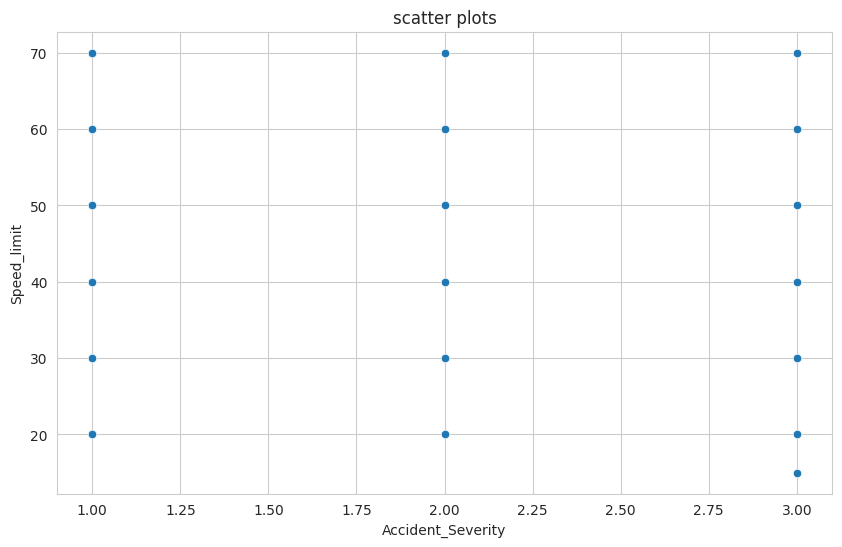

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X, x='Accident_Severity', y='Speed_limit')
plt.title('scatter plots')
plt.xlabel('Accident_Severity')
plt.ylabel('Speed_limit')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [19]:
# Identify columns with non-numerical data (e.g., dates)
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convert non-numerical columns to numerical representation
for col in non_numeric_cols:
    if X[col].dtype == 'object':  # Check if the column is of object type (likely string)
        try:
            X[col] = pd.to_datetime(X[col])  # Try converting to datetime
            X[col] = X[col].apply(lambda x: x.toordinal())  # Convert datetime to ordinal
        except:
            # Handle cases where conversion to datetime fails, likely other string columns
            # Use LabelEncoder to convert categorical strings to numerical labels
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

<ipython-input-19-e71625b8ad6a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])  # Try converting to datetime
<ipython-input-19-e71625b8ad6a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])  # Try converting to datetime
<ipython-input-19-e71625b8ad6a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])  # Try converting to datetime
<ipython-input-19-e71625b8ad6a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ens

In [22]:
#Find optimum number of cluster


sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [23]:
#Build the Kmeans clustering model

kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=2)

In [24]:
#Find the cluster center
kmeans.cluster_centers_

array([[ 4.85770081e+05,  1.76682745e+05, -7.60146058e-01,
         5.14745747e+01,  3.25814557e+01,  2.84281677e+00,
         1.84537539e+00,  1.31325899e+00,  7.33762631e+05,
         4.12605973e+00,  3.70353930e+02,  1.10846979e+02,
         4.00557550e+00,  8.28640648e+02,  2.45871840e+00,
         3.89807531e+01,  2.67333690e+00,  3.38866799e+02,
         1.99354617e+00,  2.24536012e+00,  3.36324754e+00,
         1.67035821e+00,  1.33136027e+00,  1.34957611e+00,
         8.14595585e-01,  2.00946250e+03],
       [ 4.06320335e+05,  3.73588457e+05, -1.90516757e+00,
         5.32561467e+01,  1.82369203e+01,  2.83595013e+00,
         1.84930364e+00,  1.41359345e+00,  7.33711815e+05,
         4.12618017e+00,  2.41993010e+02,  8.75146836e+01,
         4.15726879e+00,  1.24997825e+03,  2.47457097e+00,
         3.87329821e+01,  2.80507016e+00,  4.39202598e+02,
         1.99295811e+00,  2.22612279e+00,  3.38438266e+00,
         1.79562881e+00,  1.58682385e+00,  1.35188566e+00,
         8.05

In [25]:
#Predict the cluster group:
pred = kmeans.fit_predict(X)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

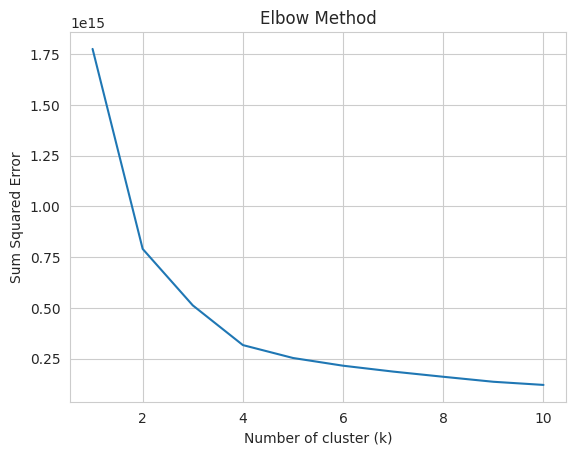

In [26]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [30]:
#

## Plot the data points with their predicted cluster center

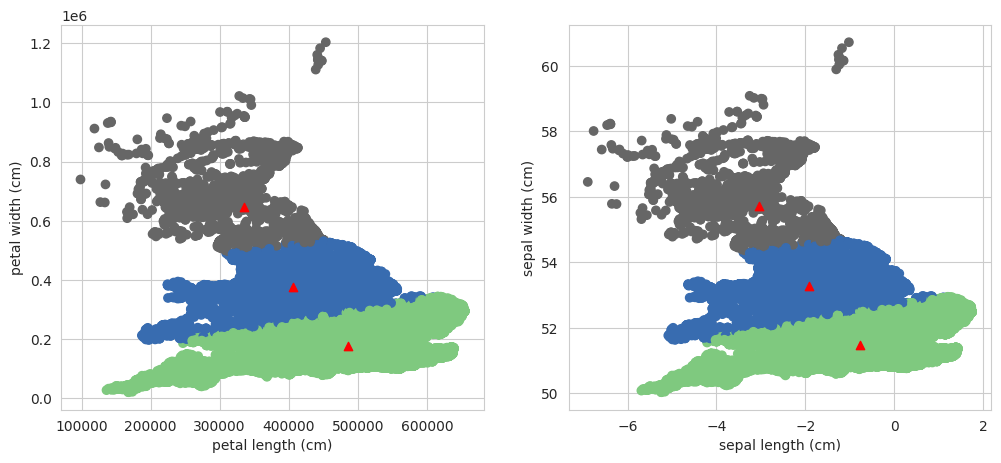

In [29]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
# Convert the DataFrame columns to NumPy arrays for plotting
plt.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
# Convert the DataFrame columns to NumPy arrays for plotting
plt.scatter(X.iloc[:,2].values, X.iloc[:,3].values, c=pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [31]:
#in Clustering The algorithm initializes cluster centroids and iteratively assigns data points to the nearest centroid, updating centroids based on the mean of points in each cluster.So in Accident_Severity feature there is number of attributes that highly affect the level of accident which are Weather_Conditions ,Road_Surface_Conditions,Speed_limit.